# Upload and Prepare Phenotype Model

In [1]:
import pandas as pd
import numpy as np

## Upload model

Inputs for type 2 diabetes should be:
- type2diabetesAncestry
- MONDO_0005148

In [2]:
print("Enter the phenotype:")
phenotype = input()

print("Enter the MONDO id:")
mondoId = input()

Enter the phenotype:


 type2diabetesAncestry


Enter the MONDO id:


 MONDO_0005148


In [3]:
!mkdir {phenotype}
!mkdir {phenotype}/model
#!pgscatalog-download --efo {mondoId} -b GRCh37 -o {phenotype}/model

## Combine model

In [5]:
samples = !ls {phenotype}/model
samplesList = phenotype + "/model/" + (" " + phenotype + "/model/").join(samples)
samplesList

'type2diabetes/model/PGS000014_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000020_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000031_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000032_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000033_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000036_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000125_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000330_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000712_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000713_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000729_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000804_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000805_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000806_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000807_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000808_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000832_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000848_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000849_hmPOS_GRCh37.txt.gz type2diabetes/model/PGS000850_hmPOS_GRCh37.txt.gz

In [7]:
!pgscatalog-combine -s {samplesList} -t GRCh37 -o {phenotype}/combined.txt

  2%|▌                                        | 2/133 [01:11<1:04:44, 29.65s/it]pgscatalog.core.lib._normalise: 2024-05-04 18:08:32 WARNING  Multiple other_alleles detected in 16 variants
pgscatalog.core.lib._normalise: 2024-05-04 18:08:32 WARNING  Other allele for these variants is set to missing
pgscatalog.core.lib._normalise: 2024-05-04 18:08:32 WARNING  Multiple other_alleles detected in 5 variants
pgscatalog.core.lib._normalise: 2024-05-04 18:08:32 WARNING  Other allele for these variants is set to missing
pgscatalog.core.lib._normalise: 2024-05-04 18:08:32 WARNING  Multiple other_alleles detected in 1 variants
pgscatalog.core.lib._normalise: 2024-05-04 18:08:32 WARNING  Other allele for these variants is set to missing
  9%|███▊                                      | 12/133 [02:33<17:22,  8.61s/it]pgscatalog.core.lib._normalise: 2024-05-04 18:09:54 WARNING  4 bad variants
pgscatalog.core.lib._normalise: 2024-05-04 18:09:54 WARNING  4 bad variants
pgscatalog.core.lib._normalise: 2

In [8]:
!wc -l {phenotype}/combined.txt

 107742916 type2diabetes/combined.txt


In [9]:
print('head')
!head {phenotype}/combined.txt
print('tail')
!tail {phenotype}/combined.txt

head
chr_name	chr_position	effect_allele	other_allele	effect_weight	effect_type	is_duplicated	accession	row_nr
1	55326	T	C	4.7746e-06	additive	False	PGS000014	0
1	64649	A	C	2.4708e-05	additive	False	PGS000014	1
1	662622	G	A	2.6507e-05	additive	False	PGS000014	2
1	693731	A	G	1.7749e-05	additive	False	PGS000014	3
1	701835	T	C	8.0876e-06	additive	False	PGS000014	4
1	706368	G	A	2.8262e-07	additive	False	PGS000014	5
1	714019	A	G	9.404e-06	additive	False	PGS000014	6
1	714427	G	A	1.472e-06	additive	False	PGS000014	7
1	715265	C	T	1.8088e-05	additive	False	PGS000014	8
tail
22	51222052	G	A	2.0378e-06	additive	False	PGS004868	6580794
22	51222100	T	G	1.8426e-05	additive	False	PGS004868	6580795
22	51222766	A	G	1.6338e-05	additive	False	PGS004868	6580796
22	51224600	G	A	5.9393e-06	additive	False	PGS004868	6580797
22	51227891	G	A	2.8116e-06	additive	False	PGS004868	6580798
22	51228910	G	A	9.5731e-06	additive	False	PGS004868	6580799
22	51229805	C	T	1.3227e-06	additive	False	PGS004868	6580800
22	512298

## Prepare, reduce and deduplicate model

In [4]:
combined_weights = pd.read_csv(phenotype + '/combined.txt', delimiter="\t")
combined_weights

/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_6757/3016281645.py:1: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_weights = pd.read_csv(phenotype + '/combined.txt', delimiter="\t")


,chr_name,chr_position,effect_allele,other_allele,effect_weight,effect_type,is_duplicated,accession,row_nr
0,1,55326.0,T,C,4.774600e-06,additive,False,PGS000014,0
1,1,64649.0,A,C,2.470800e-05,additive,False,PGS000014,1
2,1,662622.0,G,A,2.650700e-05,additive,False,PGS000014,2
3,1,693731.0,A,G,1.774900e-05,additive,False,PGS000014,3
4,1,701835.0,T,C,8.087600e-06,additive,False,PGS000014,4
...,...,...,...,...,...,...,...,...,...
107742910,22,51228910.0,G,A,9.573100e-06,additive,False,PGS004868,6580799
107742911,22,51229805.0,C,T,1.322700e-06,additive,False,PGS004868,6580800
107742912,22,51229855.0,G,A,9.534400e-07,additive,False,PGS004868,6580801
107742913,22,51233300.0,C,T,5.013300e-06,additive,False,PGS004868,6580802


In [4]:
## OR instead of preprocessing just upload existing preprocessed file
combined_weights_reduced = pd.read_csv('type2diabetes/combined_weights_reduced_0.01_deduplecated.txt', comment='#', delimiter=',')

/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_58162/2114239681.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_weights_reduced = pd.read_csv('type2diabetes/combined_weights_reduced_0.01_deduplecated.txt', comment='#', delimiter=',')


In [5]:
combined_weights_reduced

,chr_name,chr_position,effect_allele,other_allele,effect_weight,effect_type,is_duplicated,accession,row_nr,chr_coordinate
0,8,110552252,G,T,-5.484162,additive,False,PGS002475,8049,8:110552252
1,8,110551664,T,C,-5.307112,additive,False,PGS002524,46073,8:110551664
2,11,113370891,A,G,3.925090,additive,False,PGS002524,60360,11:113370891
3,14,24952289,C,T,-3.891308,additive,False,PGS002475,12566,14:24952289
4,7,99849572,G,C,-3.780482,additive,False,PGS002573,301,7:99849572
...,...,...,...,...,...,...,...,...,...,...
828618,2,71163051,T,C,-0.020000,additive,False,PGS000729,213092,2:71163051
828619,17,30864001,T,G,0.020000,additive,False,PGS000729,1749933,17:30864001
828620,5,156355151,A,C,-0.020000,additive,False,PGS000729,692894,5:156355151
828621,17,30654469,A,G,0.020000,additive,False,PGS000729,1749837,17:30654469


In [12]:
top_n_percentage = 0.01

In [5]:
top_n_percentage = 0.5

!echo $(date)
combined_weights_reduced = combined_weights.sort_values('effect_weight',key=abs,ascending=False).head(int(len(combined_weights) * top_n_percentage))
combined_weights_reduced.replace([np.inf, -np.inf], np.nan, inplace=True)
combined_weights_reduced = combined_weights_reduced.dropna(subset=['chr_name', 'chr_position'])
combined_weights_reduced['chr_position'] = combined_weights_reduced['chr_position'].astype(int)
!echo $(date)

combined_weights_reduced

Sat May 4 23:40:12 MSK 2024
Sat May 4 23:41:50 MSK 2024


,chr_name,chr_position,effect_allele,other_allele,effect_weight,effect_type,is_duplicated,accession,row_nr
30999374,8,110552252,G,T,-5.484162,additive,False,PGS002475,8049
30989410,8,110552252,G,T,-5.484162,additive,False,PGS002426,2032
31053659,8,110552252,G,T,-5.484162,additive,False,PGS002524,46059
31053673,8,110551664,T,C,-5.307112,additive,False,PGS002524,46073
30989424,8,110551664,T,C,-5.307112,additive,False,PGS002426,2046
...,...,...,...,...,...,...,...,...,...
52067243,7,63818176,G,T,0.000010,additive,False,PGS003102,4374407
70033282,17,53039483,G,A,0.000010,additive,False,PGS003982,952029
58366941,14,99789082,C,T,0.000010,additive,False,PGS003117,1133765
68142415,2,105791914,C,T,0.000010,additive,False,PGS003867,129328


In [6]:
combined_weights = 0

In [7]:
!echo $(date)

combined_weights_reduced['chr_coordinate'] = combined_weights_reduced[['chr_name', 'chr_position']].apply(lambda row: ':'.join(row.values.astype(str)), axis=1)
combined_weights_reduced = combined_weights_reduced.sort_values('effect_weight',key=abs,ascending=False).drop_duplicates(subset=['chr_coordinate', 'effect_allele'], keep='first')
!echo $(date)

combined_weights_reduced

Sat May 4 23:41:51 MSK 2024
Sat May 4 23:47:23 MSK 2024


,chr_name,chr_position,effect_allele,other_allele,effect_weight,effect_type,is_duplicated,accession,row_nr,chr_coordinate
30999374,8,110552252,G,T,-5.484162,additive,False,PGS002475,8049,8:110552252
31053673,8,110551664,T,C,-5.307112,additive,False,PGS002524,46073,8:110551664
31067960,11,113370891,A,G,3.925090,additive,False,PGS002524,60360,11:113370891
31003891,14,24952289,C,T,-3.891308,additive,False,PGS002475,12566,14:24952289
31103188,7,99849572,G,C,-3.780482,additive,False,PGS002573,301,7:99849572
...,...,...,...,...,...,...,...,...,...,...
89936678,5,125406441,C,T,-0.000010,additive,False,PGS004839,1063954,5:125406441
100797608,11,5367642,G,A,0.000010,additive,False,PGS004859,743732,11:5367642
89744911,4,138948344,G,A,-0.000010,additive,False,PGS004839,872187,4:138948344
52067243,7,63818176,G,T,0.000010,additive,False,PGS003102,4374407,7:63818176


In [8]:
combined_weights_reduced.to_csv(phenotype + '/combined_weights_reduced_' + str(top_n_percentage) + '_deduplecated.txt', index=False)

# Prepare dataset

In [33]:
import xml.etree.ElementTree as et
import requests

## Type 2 diabetes

Open access data from OpenSNP

https://opensnp.org/phenotypes/50

### Fasting glucose without meds:

Normal=<6.1 (<110)mmol/l(mg/dl)

Impaired fasting glycaemia=≥ 6.1(≥110) & <7.0(<126)mmol/l(mg/dl)

Impaired glucose tolerance=<7.0 (<126)mmol/l(mg/dl)

Diabetes mellitus [T2D]=≥7.0 (≥126)mmol/l(mg/dl)

### Known Phenotypes:


No = no

Normal = no

No, but genetically predisposed = almost

Diabetes mellitus [t2d] = type2

R1b1a2a1a1a4 - useless, will be reduced

Prediabetic = almost

Gestational diabetes = type1

Gestational diabetic and now type ii = type2

No. i have type 1 diabetes = type1

Rs7903146 = type2

Havent a clue - useless, will be reduced

Yes = type2

118 mg/dl = almost

In [9]:
phenotypes = {
    'useless': ['r1b1a2a1a1a4', 'havent a clue'],
    'type2': ['diabetes mellitus [t2d]', 'gestational diabetic and now type ii', 'Rs7903146', 'yes'],
    'type1': ['gestational diabetes', 'No. i have type 1 diabetes'],
    'no': ['no', 'normal'],
    'almost': ['no, but genetically predisposed', 'prediabetic', '118 mg/dl']
}

def which_phenotype(variant):
    if variant in phenotypes.get('almost'):
        return 'almost'
    elif variant in phenotypes.get('no'):
        return 'no'
    elif variant in phenotypes.get('type1'):
        return 'type1'
    elif variant in phenotypes.get('type2'):
        return 'type2'
    else:
        return 'useless'

## Upload data from OpenSNP

Many people uploaded data from AncestryDNA

https://www.ancestry.com/dna/en/legal/international/faq

Type 2 diabetes has 50 OpenSNP Id

In [35]:
print('Enter OpenSNP phenotype id:')
open_snp_id = input()

Enter OpenSNP phenotype id:


 50


In [36]:
url = "https://opensnp.org/phenotypes/" + open_snp_id + '/rss'

root = et.fromstring(requests.get(url).content)

xml_samples = [[item.find('dlink').text, item.find('variation').text.strip().lower()] for item in root.findall('./channel/item')]

xml_samples

[['http://opensnp.org/data/12349.ancestry.10184',
  'no, but genetically predisposed'],
 ['http://opensnp.org/data/12299.23andme.10131', 'no'],
 ['http://opensnp.org/data/12274.23andme.10108', 'rs7903146'],
 ['http://opensnp.org/data/12258.23andme.10097', 'no'],
 ['http://opensnp.org/data/12078.ftdna-illumina.9947',
  'no, but genetically predisposed'],
 ['http://opensnp.org/data/12049.23andme.9908',
  'no, but genetically predisposed'],
 ['http://opensnp.org/data/11698.23andme.9613', 'no'],
 ['http://opensnp.org/data/11531.23andme.9422', 'no'],
 ['http://opensnp.org/data/11499.ancestry.9392', 'no. i have type 1 diabetes'],
 ['http://opensnp.org/data/11396.ancestry.9318',
  'no, but genetically predisposed'],
 ['http://opensnp.org/data/10632.23andme.9278', '118 mg/dl'],
 ['http://opensnp.org/data/10507.23andme.8778', 'diabetes mellitus [t2d]'],
 ['http://opensnp.org/data/10469.23andme.8739', 'no'],
 ['http://opensnp.org/data/9992.23andme.8254',
  'gestational diabetic and now type ii']

In [37]:
samples_df = pd.DataFrame(xml_samples, columns=['dlink', 'variant'])
samples_df

,dlink,variant
0,http://opensnp.org/data/12349.ancestry.10184,"no, but genetically predisposed"
1,http://opensnp.org/data/12299.23andme.10131,no
2,http://opensnp.org/data/12274.23andme.10108,rs7903146
3,http://opensnp.org/data/12258.23andme.10097,no
4,http://opensnp.org/data/12078.ftdna-illumina.9947,"no, but genetically predisposed"
...,...,...
217,http://opensnp.org/data/80.23andme.41,no
218,http://opensnp.org/data/60.23andme.27,no
219,http://opensnp.org/data/42.23andme.18,normal
220,http://opensnp.org/data/1.23andme.9,normal


In [38]:
!mkdir {phenotype}/no
!mkdir {phenotype}/type1
!mkdir {phenotype}/type2
!mkdir {phenotype}/almost

In [78]:
corrupted_files = ['6813.23andme.5200', '5211.23andme.3722', '4290.23andme.2910', '4290.23andme.2910', '4245.23andme.2883', 
                   '4240.23andme.2879', '4178.23andme.2835', '3395.23andme.2208', '3343.23andme.2176', '2199.23andme.1344']

def is_known_file_format(dlink):
    dlink = dlink.lower()
    is_not_corrupted = True
    for corrupted in corrupted_files:
        is_not_corrupted = is_not_corrupted and corrupted not in dlink
    return ('.ancestry.' in dlink or '.23andme.' in dlink) and is_not_corrupted

In [41]:
def filename(dlink):
    return sample[1].split('/')[-1]

In [79]:
cols = ['chromosome', 'position']

sample_size = 0
sample = 0
data = 0

for sample in samples_df.itertuples():
    if which_phenotype(sample[2]) != 'useless' and is_known_file_format(sample[1]):
        sample_size += 1
        print('Reading to', str(sample_size), ':', phenotype + '/' + which_phenotype(sample[2]) + '/' + filename(sample[1]))
        
        data = pd.read_csv(sample[1], comment='#', delimiter="\t")
        if '23andme' in sample[1].lower():
            data.columns = ['rsid', 'chromosome', 'position', 'alleles']
            data['allele1'] = data['alleles'].astype(str).str[0]
            data['allele2'] = data['alleles'].astype(str).str[1]
            data = data.drop(columns=['alleles'])
        else:
            data.columns = ['rsid', 'chromosome', 'position', 'allele1', 'allele2']

        data['chr_coordinate'] = data[cols].apply(lambda row: ':'.join(row.values.astype(str)), axis=1)
        data.to_csv(phenotype + '/' + which_phenotype(sample[2]) + '/' + filename(sample[1]), index=False)

print('Sample size is', sample_size)

Reading to 1 : type2diabetes/type2/3334.23andme.2173


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 2 : type2diabetes/no/3104.23andme.1999


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 3 : type2diabetes/type2/3082.23andme.1983


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 4 : type2diabetes/almost/2903.23andme.1843


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 5 : type2diabetes/no/2797.23andme.1771


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 6 : type2diabetes/type2/2718.23andme.1742


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 7 : type2diabetes/no/2645.23andme.1662


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 8 : type2diabetes/no/2576.23andme.1632


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 9 : type2diabetes/almost/2575.23andme.1594


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 10 : type2diabetes/no/2557.23andme.1575


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 11 : type2diabetes/no/2456.23andme.1553


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 12 : type2diabetes/type2/2516.23andme.1545


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 13 : type2diabetes/no/2455.23andme.1519


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 14 : type2diabetes/no/2446.23andme.1510


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 15 : type2diabetes/no/2385.23andme.1478


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 16 : type2diabetes/no/2379.23andme.1475


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 17 : type2diabetes/no/2358.ancestry.1458
Reading to 18 : type2diabetes/no/2307.23andme.1417


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 19 : type2diabetes/no/2288.23andme.1401


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 20 : type2diabetes/no/2249.23andme.1384


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 21 : type2diabetes/no/1472.23andme.1376
Reading to 22 : type2diabetes/no/2203.ancestry.1347
Reading to 23 : type2diabetes/no/2183.23andme.1330


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 24 : type2diabetes/no/1952.23andme.1206


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 25 : type2diabetes/type2/2008.23andme.1193


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 26 : type2diabetes/no/2004.23andme.1189


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 27 : type2diabetes/no/1987.23andme.1174


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 28 : type2diabetes/no/1975.23andme.1162


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 29 : type2diabetes/no/1764.23andme.1025


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 30 : type2diabetes/no/1742.23andme.1010


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 31 : type2diabetes/no/1712.23andme.988


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 32 : type2diabetes/no/1647.ancestry.939
Reading to 33 : type2diabetes/no/1532.23andme.844


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 34 : type2diabetes/type1/1499.23andme.818


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 35 : type2diabetes/no/1375.23andme.726


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 36 : type2diabetes/no/1215.23andme.645


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 37 : type2diabetes/no/1173.23andme.609


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 38 : type2diabetes/no/1103.23andme.565


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 39 : type2diabetes/no/1075.23andme.550


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 40 : type2diabetes/no/1035.ancestry.518
Reading to 41 : type2diabetes/no/1029.23andme.515


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 42 : type2diabetes/no/1028.23andme.514


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 43 : type2diabetes/no/943.23andme.470


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 44 : type2diabetes/no/918.23andme.454


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 45 : type2diabetes/almost/916.23andme.452


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 46 : type2diabetes/almost/915.23andme.451


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 47 : type2diabetes/no/808.23andme.390


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 48 : type2diabetes/no/806.23andme.388


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 49 : type2diabetes/no/782.23andme.371


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 50 : type2diabetes/no/761.23andme.360


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 51 : type2diabetes/type2/717.23andme.333


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 52 : type2diabetes/no/693.23andme.321


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 53 : type2diabetes/no/328.23andme.316


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 54 : type2diabetes/no/667.23andme.308


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 55 : type2diabetes/no/637.23andme.293


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 56 : type2diabetes/no/613.23andme.285


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 57 : type2diabetes/no/503.23andme.274


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 58 : type2diabetes/no/187.23andme.267


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 59 : type2diabetes/no/580.23andme.265
Reading to 60 : type2diabetes/no/561.23andme.257


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 61 : type2diabetes/no/549.23andme.252


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 62 : type2diabetes/no/528.23andme.240


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 63 : type2diabetes/no/502.23andme.226


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 64 : type2diabetes/no/495.23andme.223


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 65 : type2diabetes/no/441.23andme.199


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 66 : type2diabetes/no/437.23andme.190


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 67 : type2diabetes/no/397.23andme.178


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 68 : type2diabetes/no/11.23andme.176


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 69 : type2diabetes/no/189.23andme.174


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 70 : type2diabetes/no/380.23andme.172


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 71 : type2diabetes/no/368.23andme.168


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 72 : type2diabetes/no/352.23andme.161


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 73 : type2diabetes/no/347.23andme.157


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 74 : type2diabetes/no/17.23andme.143


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 75 : type2diabetes/no/276.23andme.110


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 76 : type2diabetes/type2/141.23andme.60


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 77 : type2diabetes/no/80.23andme.41


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 78 : type2diabetes/no/60.23andme.27


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 79 : type2diabetes/no/42.23andme.18


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 80 : type2diabetes/no/1.23andme.9


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Reading to 81 : type2diabetes/no/8.23andme.2


/var/folders/3f/_81l_gq14bzc90fk235z5tg40000gn/T/ipykernel_2399/634407162.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(sample[1], comment='#', delimiter="\t")


Sample size is 81


In [82]:
sample_size = 0
for sample in samples_df.itertuples():
    if which_phenotype(sample[2]) != 'useless' and is_known_file_format(sample[1]):
        sample_size += 1
        print('Should be', str(sample_size), ':', phenotype + '/' + which_phenotype(sample[2]) + '/' + filename(sample[1]))
print('Sample size is', sample_size)

Should be 1 : type2diabetes/almost/12349.ancestry.10184
Should be 2 : type2diabetes/no/12299.23andme.10131
Should be 3 : type2diabetes/no/12258.23andme.10097
Should be 4 : type2diabetes/almost/12049.23andme.9908
Should be 5 : type2diabetes/no/11698.23andme.9613
Should be 6 : type2diabetes/no/11531.23andme.9422
Should be 7 : type2diabetes/almost/11396.ancestry.9318
Should be 8 : type2diabetes/almost/10632.23andme.9278
Should be 9 : type2diabetes/type2/10507.23andme.8778
Should be 10 : type2diabetes/no/10469.23andme.8739
Should be 11 : type2diabetes/type2/9992.23andme.8254
Should be 12 : type2diabetes/almost/9974.ancestry.8238
Should be 13 : type2diabetes/no/9932.23andme.8194
Should be 14 : type2diabetes/almost/9905.ancestry.8173
Should be 15 : type2diabetes/no/9869.23andme.8128
Should be 16 : type2diabetes/no/9486.23andme.7780
Should be 17 : type2diabetes/almost/9243.ancestry.7569
Should be 18 : type2diabetes/no/9111.ancestry.7452
Should be 19 : type2diabetes/no/8747.23andme.7081
Should

## Data preparation

In [8]:
samples_df_files_almost = !ls {phenotype}/almost
samples_df_files_phenotypes = ['almost' for i in range(len(samples_df_files_almost))]
samples_df_files_no = !ls {phenotype}/no
samples_df_files_phenotypes += ['no' for i in range(len(samples_df_files_no))]
#samples_df_files_type1 = !ls {phenotype}/type1
#samples_df_files_phenotypes += ['type1' for i in range(len(samples_df_files_type1))]
samples_df_files_type2 = !ls {phenotype}/type2
samples_df_files_phenotypes += ['type2' for i in range(len(samples_df_files_type2))]
samples_df_files = samples_df_files_almost + samples_df_files_no + samples_df_files_type2
    #samples_df_files_type1 + 
samples_df_files = pd.DataFrame(list(zip(samples_df_files, samples_df_files_phenotypes)),
               columns =['filename', 'phenotype'])

samples_df_files

,filename,phenotype
0,11396.ancestry.9318,almost
1,12349.ancestry.10184,almost
2,4552.ancestry.3240,almost
3,4742.ancestry.3333,almost
4,5027.ancestry.3561,almost
5,6493.ancestry.4913,almost
6,7707.ancestry.6050,almost
7,9243.ancestry.7569,almost
8,9905.ancestry.8173,almost
9,9974.ancestry.8238,almost


In [9]:
combined_weights_reduced

,chr_name,chr_position,effect_allele,other_allele,effect_weight,effect_type,is_duplicated,accession,row_nr,chr_coordinate
0,8,110552252,G,T,-5.484162,additive,False,PGS002475,8049,8:110552252
1,8,110551664,T,C,-5.307112,additive,False,PGS002524,46073,8:110551664
2,11,113370891,A,G,3.925090,additive,False,PGS002524,60360,11:113370891
3,14,24952289,C,T,-3.891308,additive,False,PGS002475,12566,14:24952289
4,7,99849572,G,C,-3.780482,additive,False,PGS002573,301,7:99849572
...,...,...,...,...,...,...,...,...,...,...
828618,2,71163051,T,C,-0.020000,additive,False,PGS000729,213092,2:71163051
828619,17,30864001,T,G,0.020000,additive,False,PGS000729,1749933,17:30864001
828620,5,156355151,A,C,-0.020000,additive,False,PGS000729,692894,5:156355151
828621,17,30654469,A,G,0.020000,additive,False,PGS000729,1749837,17:30654469


# PRS Linear Model Prediction

In [10]:
def count_effect_alleles(row):
    ctr = 0
    if row['allele1'] == row['effect_allele']:
        ctr += 1
    if row['allele2'] == row['effect_allele']:
        ctr += 1
    return ctr

In [13]:
sample = 0
data = 0
linear_prs = []

!echo $(date)

for sample in samples_df_files.itertuples():
    data = pd.read_csv(phenotype + '/' + sample[2] + '/' + sample[1])
        
    data = combined_weights_reduced.merge(data, on='chr_coordinate', how='left').fillna(0)
    data['effect_alleles_count'] = data.apply(count_effect_alleles, axis=1)
    data['prs_val'] = data['effect_alleles_count'] * data['effect_weight']
    linear_prs.append(data['prs_val'].values.sum())

!echo $(date)

samples_df_files['linear_prs'] = linear_prs
samples_df_files.to_csv(phenotype + '/Linear_PRS_df_' + str(top_n_percentage), index=False)
samples_df_files

Thu May 9 15:51:18 MSK 2024
Thu May 9 15:53:10 MSK 2024


,filename,phenotype,linear_prs
0,11396.ancestry.9318,almost,8.456608
1,12349.ancestry.10184,almost,-23.528224
2,4552.ancestry.3240,almost,-379.524950
3,4742.ancestry.3333,almost,-372.635160
4,5027.ancestry.3561,almost,-16.080513
5,6493.ancestry.4913,almost,40.996302
6,7707.ancestry.6050,almost,13.518172
7,9243.ancestry.7569,almost,0.453317
8,9905.ancestry.8173,almost,-10.197623
9,9974.ancestry.8238,almost,-26.281231


# Plots

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
!mkdir {phenotype}/pic

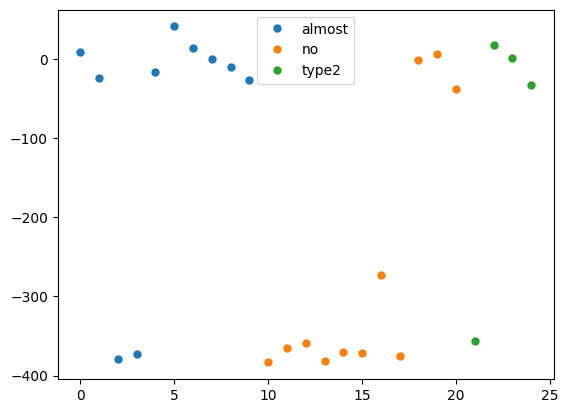

In [16]:
groups = samples_df_files.groupby('phenotype')

f = plt.figure()

for name, group in groups:
    plt.plot(group.index, group['linear_prs'], marker='o', linestyle='', markersize=5, label=name)

plt.legend()
plt.show()

f.savefig(phenotype + '/pic/gouped_' + str(top_n_percentage) + '.pdf', bbox_inches='tight')

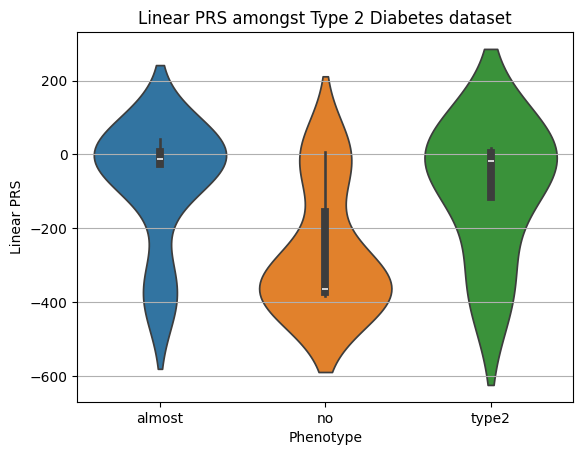

In [17]:
fontsize = 10

fig, axes = plt.subplots()
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns_plot = sns.violinplot(x='phenotype', y='linear_prs', data=samples_df_files, ax=axes, hue="phenotype")
axes.set_title('Linear PRS amongst Type 2 Diabetes dataset')

axes.yaxis.grid(True)
axes.set_xlabel('Phenotype')
axes.set_ylabel('Linear PRS')

sns_plot.get_figure().savefig(phenotype + '/pic/violin_' + str(top_n_percentage) + '.png')

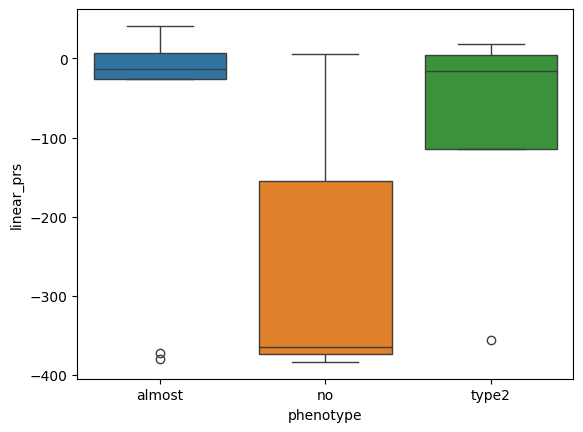

In [18]:
sns_plot = sns.boxplot(data=samples_df_files, x="phenotype", y="linear_prs", hue="phenotype")

sns_plot.get_figure().savefig(phenotype + '/pic/box_' + str(top_n_percentage) + '.png')